In [11]:
import tensorflow as tf
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [3]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [6]:
import cv2
import imghdr

In [7]:
data_dir = "data"

In [ ]:
os.listdir(os.path.join(data_dir, 'happy'))

In [8]:
image_exts = ['jpeg', 'jpg','bmp','png']

In [9]:
image_exts[2]

'bmp'

In [13]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list{}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))


Image not in ext listdata\happy\2560px-Happy_People.jpg
Image not in ext listdata\happy\guilherme-stecanella-375176-unsplash.jpg
Image not in ext listdata\happy\Happy20People.jpg
Image not in ext listdata\sad\depositphotos_210655610-stock-photo-sad-man-sitting-floor-home.jpg
Image not in ext listdata\sad\depositphotos_508407352-stock-photo-caucasian-male-sitting-floor-windows.jpg
Image not in ext listdata\sad\sad-person-pictures-2bnso9uiwlhrikrx.jpg
Image not in ext listdata\sad\sad-person-pictures-43vbzyaz0nlwlg1q.jpg
Image not in ext listdata\sad\very-sad-man-sitting-alone-on-white-background-depressed-young-man-sitting-businessman-vector.jpg


In [ ]:
tf.data.Dataset??

In [15]:
import numpy as np
from matplotlib import pyplot as plt

In [24]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 163 files belonging to 2 classes.


In [18]:
data_iterator = data.as_numpy_iterator()

In [21]:
batch = scaled_iterator.next()

In [23]:
batch[0].max()

255.0

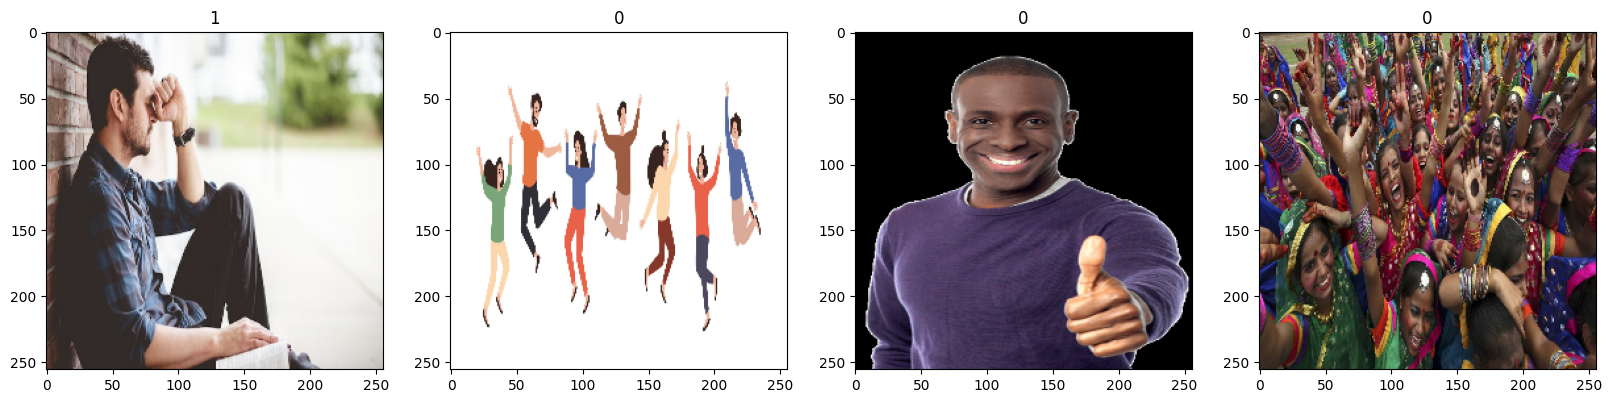

In [22]:
fig,ax = plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [25]:
data = data.map(lambda x,y: (x/255, y))

In [26]:
scaled_iterator = data.as_numpy_iterator()

In [27]:
batch = scaled_iterator.next()

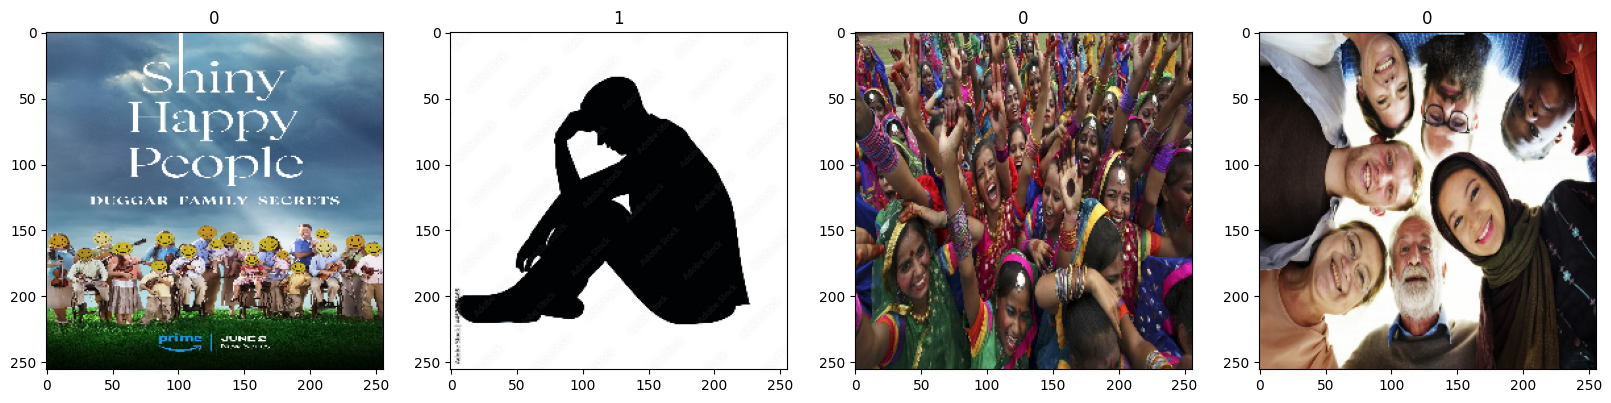

In [30]:
fig,ax = plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [32]:
batch[0].min()

0

In [33]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [38]:
test_size

1

In [40]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [41]:
len(test)

1

In [42]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [43]:
model = Sequential()

In [44]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [45]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [47]:
logdir='logs'

In [48]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= logdir)

In [50]:
hist = model.fit(train, epochs = 20, validation_data=val, callbacks= [tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 8s 1s/step - loss: 0.9820 - accuracy: 0.5625 - val_loss: 0.6267 - val_accuracy: 0.6875
Epoch 2/20
4/4 [==============================] - 6s 1s/step - loss: 0.5943 - accuracy: 0.6406 - val_loss: 0.5429 - val_accuracy: 0.6562
Epoch 3/20
4/4 [==============================] - 6s 1s/step - loss: 0.5890 - accuracy: 0.7422 - val_loss: 0.4758 - val_accuracy: 0.8438
Epoch 4/20
4/4 [==============================] - 7s 1s/step - loss: 0.4899 - accuracy: 0.7500 - val_loss: 0.4134 - val_accuracy: 0.8750
Epoch 5/20
4/4 [==============================] - 6s 1s/step - loss: 0.4367 - accuracy: 0.8594 - val_loss: 0.4583 - val_accuracy: 0.6875
Epoch 6/20
4/4 [==============================] - 6s 1s/step - loss: 0.3853 - accuracy: 0.8281 - val_loss: 0.2430 - val_accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 6s 1s/step - loss: 0.2751 - accuracy: 0.9375 - val_loss: 0.2131 - val_accuracy: 0.9375
Epoch 8/20
4/4 [=========================

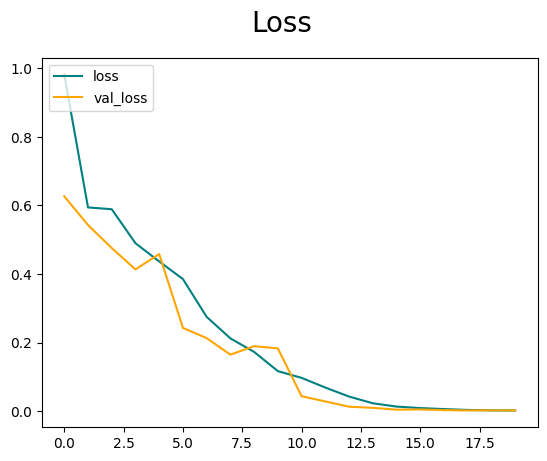

In [51]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color = 'orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

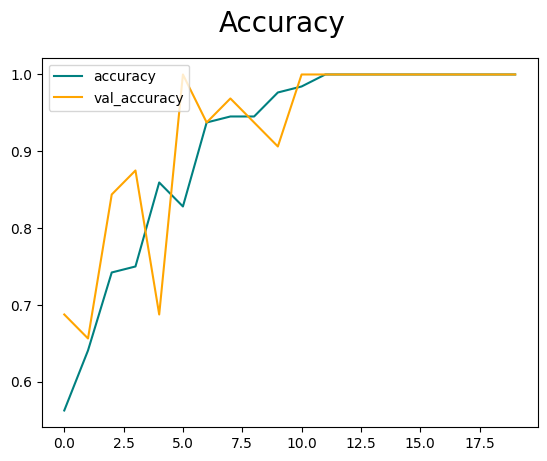

In [52]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label= 'val_accuracy')
fig.suptitle("Accuracy", fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [53]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [54]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [55]:
len(test)

1

In [56]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 151ms/step


In [58]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0,Accuracy:1.0


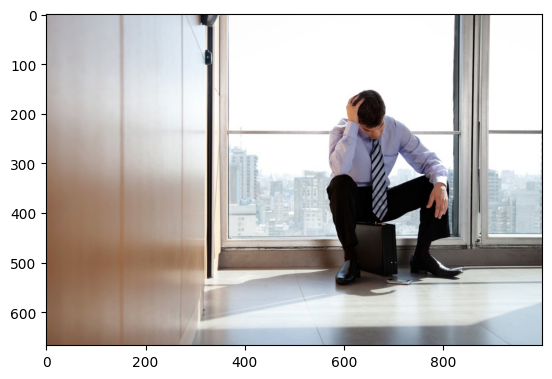

In [101]:
img = cv2.imread('sad2.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

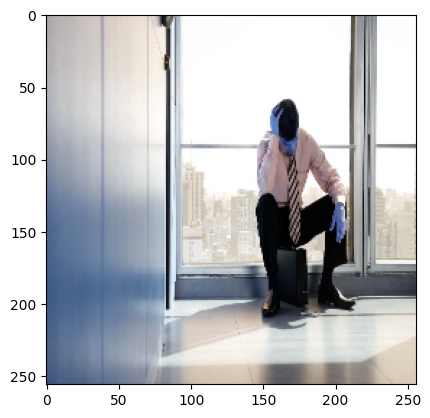

In [102]:
resize =tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
#plt.imshow(cv2.cvtColor(resize.numpy().astype(int), cv2.COLOR_BGR2RGB))
plt.show()

In [103]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [104]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 83ms/step


In [105]:
yhat

array([[0.87847793]], dtype=float32)

In [106]:
if yhat > 0.5:
    print(f'Predicted Class is Sad')
else:
    print(f'Predicted Class is Happy')

Predicted Class is Sad
